In [1]:
import rmgpy.species
import rmgpy.kinetics
import rmgpy.thermo
import rmgpy.data.rmg

import copy

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def plot_kinetics(rxns, labels=None):
    """Function for plotting reaction kinetics
    Takes in a list of RMG reactions (rmgpy.reaction.Reaction) or a single reaction
    """
    plt.xlabel('1000 / T (K^-1)')
    plt.ylabel('log10(k)')

    if type(rxns) != list:
        rxns = [rxns]

    T = np.linspace(300, 3000, 1001)
    for rxn in rxns:
        k = np.zeros(len(T))
        for i in range(0, len(T)):
            k[i] = rxn.get_rate_coefficient(T[i], 101325)
        plt.plot(1000.0 / T, np.log10(k))

    if labels:
        plt.legend(labels)
    plt.show()

In [3]:
database = rmgpy.data.rmg.RMGDatabase()

thermo_libraries = [
    'Klippenstein_Glarborg2016',
    'BurkeH2O2',
    'thermo_DFT_CCSDTF12_BAC', 
    'DFT_QCI_thermo',
    'primaryThermoLibrary',
    'CurranPentane'
]

database.load(
    path = rmgpy.settings['database.directory'],
    thermo_libraries = thermo_libraries,
    transport_libraries = [],
    reaction_libraries = [],
    seed_mechanisms = [],
    kinetics_families = ['H_Abstraction', 'Disproportionation'],
    kinetics_depositories = ['training'],
    depository = False,
)
# !!!!!!!!!!!!!!!!!!!!!!!! Keep this for kinetics families
for family in database.kinetics.families:
    if not database.kinetics.families[family].auto_generated:
        database.kinetics.families[family].add_rules_from_training(thermo_database=database.thermo)
        database.kinetics.families[family].fill_rules_by_averaging_up(verbose=True)



# pictures of the different families
https://github.com/ReactionMechanismGenerator/RMG-database/blob/main/families/rmg_reaction_families.pdf

In [7]:
database.kinetics.families['Disproportionation'].estimate_kinetics_using_rate_rules()

<ReactionFamily "Disproportionation">

In [55]:
# code for estimating kinetics: https://github.com/ReactionMechanismGenerator/RMG-Py/blob/main/rmgpy/data/kinetics/family.py
# Disproportionation
r1 = rmgpy.reaction.Reaction()
s1 = rmgpy.species.Species(smiles='[O]O')
s2 = rmgpy.species.Species(smiles='[CH2]CC')
s3 = rmgpy.species.Species(smiles='OO')
s4 = rmgpy.species.Species(smiles='C=CC')

s1.thermo = database.thermo.get_thermo_data(s1)
s2.thermo = database.thermo.get_thermo_data(s2)
s3.thermo = database.thermo.get_thermo_data(s3)
s4.thermo = database.thermo.get_thermo_data(s4)

r1.reactants = [s1, s2]
r1.products = [s3, s4]


print(r1)
display(r1)

print('Atoms in molcule do not start with atom labels. You must add these yourself.')
print(r1.reactants[0].molecule[0].get_all_labeled_atoms())
print(r1.reactants[1].molecule[0].get_all_labeled_atoms())
print()

database.kinetics.families['Disproportionation'].add_atom_labels_for_reaction(r1)
print('Atom labels after calling the function to add labels:')
print(r1.reactants[0].molecule[0].get_all_labeled_atoms())
print(r1.reactants[1].molecule[0].get_all_labeled_atoms())
print()

template_labels = database.kinetics.families['Disproportionation'].get_reaction_template_labels(r1)
print(template_labels)
template = database.kinetics.families['Disproportionation'].retrieve_template(template_labels)
print(template)
print()

kinetics = database.kinetics.families['Disproportionation'].get_kinetics_for_template(template, degeneracy=r1.degeneracy)[0]
print(kinetics)
print()

print('Convert to regular modified Arrhenius')
T = 1000
H_rxn = r1.get_enthalpy_of_reaction(T)
arrhenius_kinetics = kinetics.to_arrhenius(H_rxn)
print(arrhenius_kinetics)

[O]O + [CH2]CC <=> OO + C=CC


Atoms in molcule do not start with atom labels. You must add these yourself.
{}
{}

Atom labels after calling the function to add labels:
{'*1': <Atom 'O.'>}
{'*2': <Atom 'C'>, '*3': <Atom 'C.'>, '*4': <Atom 'H'>}

['Root_Ext-1R!H-R_4R->O_Ext-4O-R_Sp-5R!H-1R!H']
[<Entry index=4 label="Root_Ext-1R!H-R_4R->O_Ext-4O-R_Sp-5R!H-1R!H">]

ArrheniusBM(A=(1.02976e+08,'m^3/(mol*s)'), n=-1.08436, w0=(563000,'J/mol'), E0=(46128.3,'J/mol'), Tmin=(300,'K'), Tmax=(1500,'K'), uncertainty=RateUncertainty(mu=0.09151076886860776, var=0.2905474551235391, Tref=1000.0, N=8, data_mean=0.0, correlation='Root_Ext-1R!H-R_4R->O_Ext-4O-R_Sp-5R!H-1R!H',), comment="""Estimated from node Root_Ext-1R!H-R_4R->O_Ext-4O-R_Sp-5R!H-1R!H""")

Convert to regular modified Arrhenius
Arrhenius(A=(1.02976e+08,'m^3/(mol*s)'), n=-1.08436, Ea=(0,'kJ/mol'), T0=(1,'K'), Tmin=(300,'K'), Tmax=(1500,'K'), uncertainty=RateUncertainty(mu=0.09151076886860776, var=0.2905474551235391, Tref=1000.0, N=8, data_mean=0.0, correlation='Root_Ext-1

In [37]:
len(database.kinetics.families['H_Abstraction'].groups.entries)

536

In [42]:
# database.kinetics.families['H_Abstraction'].groups.entries

In [38]:
len(database.kinetics.families['H_Abstraction'].rules.entries)

9064

In [43]:
# database.kinetics.families['H_Abstraction'].rules.entries

In [35]:
len(database.kinetics.families['Disproportionation'].groups.entries)

234

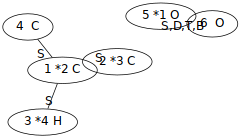

In [48]:
database.kinetics.families['Disproportionation'].groups.entries['Root_Ext-1R!H-R_4R->O_Ext-4O-R_Sp-5R!H-1R!H'].item

In [52]:
database.kinetics.families['Disproportionation'].rules.entries['Root_Ext-1R!H-R_4R->O_Ext-4O-R_Sp-5R!H-1R!H'][0].data

ArrheniusBM(A=(1.02976e+08,'m^3/(mol*s)'), n=-1.08436, w0=(563000,'J/mol'), E0=(46128.3,'J/mol'), Tmin=(300,'K'), Tmax=(1500,'K'), uncertainty=RateUncertainty(mu=0.09151076886860776, var=0.2905474551235391, Tref=1000.0, N=8, data_mean=0.0, correlation='Root_Ext-1R!H-R_4R->O_Ext-4O-R_Sp-5R!H-1R!H',), comment="""BM rule fitted to 8 training reactions at node Root_Ext-1R!H-R_4R->O_Ext-4O-R_Sp-5R!H-1R!H
    Total Standard Deviation in ln(k): 1.3105279586067948""")

# Blowers masel description: https://cantera.org/stable/reference/kinetics/rate-constants.html#blowers-masel-reactions

In [44]:
# database.kinetics.families['Disproportionation'].groups.entries

In [34]:
len(database.kinetics.families['Disproportionation'].rules.entries)

232

In [45]:
database.kinetics.families['Disproportionation'].rules.entries

OrderedDict([('Root', [<Entry index=1 label="Root">]),
             ('Root_Ext-1R!H-R', [<Entry index=2 label="Root_Ext-1R!H-R">]),
             ('Root_Ext-2R!H-R', [<Entry index=3 label="Root_Ext-2R!H-R">]),
             ('Root_4R->H', [<Entry index=4 label="Root_4R->H">]),
             ('Root_N-4R->H', [<Entry index=5 label="Root_N-4R->H">]),
             ('Root_Ext-1R!H-R_4R->O',
              [<Entry index=6 label="Root_Ext-1R!H-R_4R->O">]),
             ('Root_Ext-1R!H-R_N-4R->O',
              [<Entry index=7 label="Root_Ext-1R!H-R_N-4R->O">]),
             ('Root_Ext-2R!H-R_2R!H->C',
              [<Entry index=8 label="Root_Ext-2R!H-R_2R!H->C">]),
             ('Root_Ext-2R!H-R_N-2R!H->C',
              [<Entry index=9 label="Root_Ext-2R!H-R_N-2R!H->C">]),
             ('Root_4R->H_Sp-2R!H-1R!H',
              [<Entry index=10 label="Root_4R->H_Sp-2R!H-1R!H">]),
             ('Root_4R->H_N-Sp-2R!H-1R!H',
              [<Entry index=11 label="Root_4R->H_N-Sp-2R!H-1R!H">]),
     

In [21]:
r1.reactants[0]

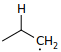

In [22]:
r1.reactants[1]

In [17]:
r1.reactants[0].molecule[0].atoms[0].label

''